# Owl
## A Retirement Planning Laboratory

This package is a retirement modeling framework for exploring the sensitivity of retirement financial decisions. Strictly speaking, it is not a planning tool, but more an environment for exploring *what if* scenarios. It provides different realizations of a financial strategy. One can certainly have a savings plan, but due to the volatility of financial investments, it is impossible to have a certain asset earnings plan. This does not mean one cannot make decisions. These decisions need to be guided with an understanding of the sensitivity of the parameters.This is exactly where this tool fits it. Given your savings and spending desires, it can generate different future realizations of your strategy under different market assumptions, helping to better understand your financial situation.

The algorithm in Owl is using the open-source HiGHS linear programming solver.
The complete formulation and detailed description of the undelying
mathematical model can be found
[here](https://raw.githubusercontent.com/mdlacasse/Owl/main/docs/owl.pdf).

Copyright - Martin-D. Lacasse (2024)

Disclaimers: *I am not a financial planner. You make your own decisions. This program comes with no guarantee. Use at your own risk.*

### <span style="color: blue"> README FIRST </span>
<span style="color:black;background:yellow;font-weight:bold">
Don't make changes directly to this file. Keep it as a working example. Therefore, it is recommended that you build your own case by making a copy of the template files provided where you will be able to enter your own numbers and explore your own assumptions.
</span>

# Tutorial - Using the case of Jack and Jill

## Introduction
This file is provided as an example to introduce you to Owl.

It is assumed that you have some familiarity with using a jupyter notebook or jupyterLab, and some basic programming skills in Python. If not, a simple tutorial can guide you to the basic skills needed.

For simulating your own realizations, use the files beginning with *template*. Make a copy and rename them keeping the same extension and give them your own names. Then you'll be able to personalize a case with your own numbers and start experimenting with Owl.

This notebook named *jack+jill* describes the case of Jack and Jill, a ficticious couple used for demonstration. Before reading this notebook, it is a good idea to run the calculations so that graphs will be displayed, which can ease learning Owl's capabilities. Running all cells is done differently depending on the platform being used. On jupyter, this is done by selecting "Restart Kernel and Run All Cells".

### Just some Python module bookkeeping
This command needs to be at the beginning of every Owl notebook.

In [1]:
import owl

## Initializing the life parameters for the realization
In order to be able to generate a realization of the future, one must start with providing the year of birth of each spouse(s) and their expected lifespan(s).

For selecting your own numbers, there are plenty of longevity predictors on the web. Pick your favorite:

https://longevityillustrator.org

https://www.livingto100.com/calculator

https://www.sunlife.ca/en/tools-and-resources/tools-and-calculators/life-expectancy-calculator/

or just Google life expectancy calculator.

There are two values needed for couples. Single individuals just enter one value in each list between square brackets `[ ]`. For couples, always keep the same order in the pair of values when entering the data.

When first creating a plan, the default values used for assets allocation ratios and rates of return will be reported. These values are listed to make you aware that these values would be used if no other choice is entered. We will cover how to do this in the next sections.

Here Jack was born in 1962 and Jill in 1965. Jack hopes to live to 89 years old, while Jill thinks she might reach age 92. Let's give this case a name.

In [2]:
plan = owl.Plan([1962, 1965], [89, 92], 'jack+jill-spending-69')

Preparing scenario of 34 years for 2 individuals.
Individual 1: life horizon from 2024 -> 2051.
Individual 2: life horizon from 2024 -> 2057.
Name of individual(s) will be read with readContributions(file).
Problem has 8 distinct time series forming 992 decision variables.


## Specify account balances and spousal beneficiaries
For each spouse, savings accounts have three buckets comprising of the total value of:
- Individual **taxable** investment or savings accounts, including bank accounts, and CDs - do not include your safety net account which should typically be sufficient for sustaining 6 months of living expenses;
- **Tax-deferred** savings accounts, including all IRAs, 401k, 403b, etc.;
- **Tax-free** savings accounts, including Roth IRAs and Roth 401k.

For married couples, each spouse will have to enter values for each type of savings account, following the same order as before. For single individuals, only one value is needed between square brackets `[ ]`.

Most investment accounts have named beneficiaries. The *beneficiary* values specify the fraction of total of assets left to the other spouse at death. For example, a spouse leaving 3/4 of her fortune to her three children and the other part to her partner would have a beneficiary value of 0.25. While this number is irrelevant for single individuals, it still needs to be entered: just use `[1]`.

Jack has \\$90 k in his taxable account, \\$600 k in his 401k, and $50 k in his Roth 401k and \\$20 k in Roth IRAs. Jill has \\$60 k in her savings bank account, \\$150 k in a 403b, and \\$40 k in Roth IRAs in which she contributed over the years. Units for \\$ are in thousands by default. You can use the `units` optional keyword to indicate that the numbers are entered in other units, such as dollars (`1`) or millions (`M`). Notice that being in Python, arithmetics can be used while entering numbers.

In [3]:
plan.setAccountBalances(
    taxable=[90, 60],
    taxDeferred=[600, 150],
    taxFree=[50 + 20, 40],
)

Taxable balances: $90,000 $60,000
Tax-deferred balances: $600,000 $150,000
Tax-free balances: $70,000 $40,000
Total post-tax wealth of approximately $785,000


Jack is anticipated to pass first and leaves everything his spouse for all his savings account. These benificiary fractions are entered as [1, 1, 1], i.e., one for each type of account. Changing these results while optimizing for maximum bequest can lead to very unanticipated results.

In [4]:
plan.setBeneficiaryFractions([1, 1, 1])

Spousal beneficiary fractions set to [1, 1, 1]
Consider changing spousal deposit fraction for better convergence.
	See setSpousalDepositFraction() for details.


## There must be a plan for wages, savings, and Roth conversions
The most manageable part of retirement planning is the control one has over work income, contributions to savings accounts, Roth conversions, and other big spending items in the near- and mid-term future.
In order to execute a realization, one must provide an earning, saving, and Roth conversion plan. This is done through providing an Excel workbook with one spreadsheet (tab) per spouse with the following information:

|year|anticipated wages|ctrb taxable | ctrb 401k | ctrb Roth 401k | ctrb IRA | ctrb Roth IRA | Roth X | big ticket items|
|--|--|--|--|--|--|--|--|--|
|2024 | | | | | | | | |
|2025 | | | | | | | | |
| ... | | | | | | | | |
|20XX | | | | | | | | |

Here, 20XX is the last row which could be the last year based on the life expectancy values provided. Missing years will be filled with empty values. For the columns, *anticipated wages* is the annual amount (gross minus tax-deferred contributions) that you anticipate to receive from employment or other sources (not including dividends from your taxable investment accounts). Note that column names are case sensitive and all of these entries must be in lower case. Best way to start this process is to use the template provided rightly named *template.xlsx*.

For the purpose of this exercise, there is no clear definition of retirement age. There will be a year, however, from which you will stop having anticipated income, or diminished income due to decreasing your work load. This transition can be gradual or sudden. Therefore there is no need to enter a retirement age for the sole purpose of quantifying your financial future.

Contributions to your savings accounts are marked as *ctrb*. We use 401k as a term which includes contributions to 403b as well. Contributions to your 401k/403b must also include your employer's contributions, if any. As this file is in Excel, one can use the native calculator to enter a percentage of the anticipated wages for contributions as this can sometimes be easier. Considering a specific example, assume that Jack earns 100k\\$ and contributes 5% to his 401k which his employer matches at up to 4%, then Jack's anticipated wages will be $(1-.05)*100000 = 95000$ and his 401k contributions will be $.09/(1 - .05) * 95000 = 9000 $. The reason for using $95000$ in the last equation allows for making cross-reference betwen the cells, as the number 100k\\$ will not appear directly. Another approach could be to use an additional column with for the total salary and derive numbers from there.

Roth conversion are specified in the column marked *Roth X*. Roth conversion are typically performed in the years when the income is lower (and therefore lower tax rates), typically in the bridge years between having a full-time regular salary and collecting social security. This column is provided to override the Roth conversion optimization in Owl. When the solver is given the option `maxConversion='file'`, then these values will be used and no optimization over Roth conversions will be performed. This column is provided for flexibility and allowing comparisons.

Finally, *big ticket items* are used for accounting for the sale or purchase of a house, or any other major expense or money that you would give or receive (e.g., inheritance, or large gifts to or from you). Therefore, the sign (+/-) of entries in this column is important. Positive numbers will be considered in the cash flow for the year and surplus will be deposited in taxable savings accounts. Negative numbers will generate withdrawals and distributions from retirement accounts. This is the only column that can contain negative numbers: all other column entries should be positive.

The tab name for each spreadsheet represents the name of the spouse for reporting yearly transactions affecting the plan. In fact, Owl extracts the names of these tabs to determine the individuals' names. Therefore, you need to rename these tabs to reflect your personal names if you want to accurately represent your case.

Note that the (free) LibreOffice software can be used if you do not have an Excel license, as LibreOffice can read and save `.xlsx` files. Moreover, the native file format from the LibreOffice software can also be read directly. However, you will have to install the `odfpy` package through `conda install odfpy` first, which might require the *conda-forge* channel to be added (`conda config --add channels conda-forge`).

Jack and Jill have provided their specific information in the file *jack+jill.xlsx*. This worksheet file needs to have two tabs, the first one named *Jack* and the second one named *Jill*, following the same order of the data provided before. Open this file in Excel and familiarize yourself with its contents.

In [5]:
plan.readContributions('jack+jill.xlsx')

Reading wages, contributions, conversions, and big-ticket items over time for Jack...
Reading wages, contributions, conversions, and big-ticket items over time for Jill...
Successfully read time horizons from file "jack+jill.xlsx".


## What are the current and future assets allocations?
Each savings account can invest in 4 major classes of assets:
- Equity funds tracking the S&P 500 index;
- Bond assets tracking the Corporate bonds (Baa) index;
- Fixed-income securities represented by the performance of 10-year Treasury notes;
- Inflation-indexed securities tracking the urban Consumer Price Index (common assets).

The total of percentages in each class of assets for each savings account must add to 100%.

You are asked to provide assets allocation ratios for today, and ones for the time at the end of your life.
Values in between will be interpolated using a linear operator by default. This can be useful
if you want to shift assets allocation as you age. One can also select an *S* curve for transitioning
from the initial value to the final value. This is done by choosing *s-curve* instead of *linear* as the method for interpolation. *S-curve* take two additional parameters, the *center* of the change which defaults to 15 years from now, and the transition *width* which defaults to 5 years. These parameters will induce
a gradual change from the initial allocations now, starting to change significantly in 10 years (15 - 5), and converging to final allocations in 20 years (15 + 5).

These parameters are optional and would be called as follows
```
plan.setInterpolationMethod('s-curve', center=10, width=3)
```
for a transition over a span of 6 years centered in 10 years from now.


In the example below, Jack's and Jill's assets allocations start in full stock equities in the tax-free account,
gradually transitioning to a more conservative portfolio towards the end of their life. Jack and Jill's tax-deferred account stay as a traditional 60/40 for the duration of the realization. Note that assets allocation ratios are entered as percentages, and that these percentages are for each type of savings account, and for each spouse.

In [6]:
plan.setInterpolationMethod('s-curve')
plan.setAllocationRatios(
    'account',
    taxable=[[[60, 40, 0, 0], [70, 30, 0, 0]], [[60, 40, 0, 0], [80, 20, 0, 0]]],
    taxDeferred=[[[60, 40, 0, 0], [70, 30, 0, 0]], [[60, 40, 0, 0], [70, 30, 0, 0]]],
    taxFree=[[[100, 0, 0, 0], [100, 0, 0, 0]], [[50, 50, 0, 0], [60, 40, 0, 0]]],
)

Asset allocation interpolation method set to s-curve.
Jack : Setting gliding allocation ratios (%) to account
      taxable: [60, 40, 0, 0] -> [70, 30, 0, 0]
  taxDeferred: [60, 40, 0, 0] -> [70, 30, 0, 0]
      taxFree: [100, 0, 0, 0] -> [100, 0, 0, 0]
Jill : Setting gliding allocation ratios (%) to account
      taxable: [60, 40, 0, 0] -> [80, 20, 0, 0]
  taxDeferred: [60, 40, 0, 0] -> [70, 30, 0, 0]
      taxFree: [50, 50, 0, 0] -> [60, 40, 0, 0]
Interpolating assets allocation ratios using s-curve method.


### Show assets allocations during the time period
The allocation of assets is shown for the three types of savings accounts (taxable, tax-deferred, and tax-free) for each spouse and for the 4 types of investments: stocks (S&P 500), corporate bonds (Baa), Treasury notes (10-y), and common assets tracking inflation.

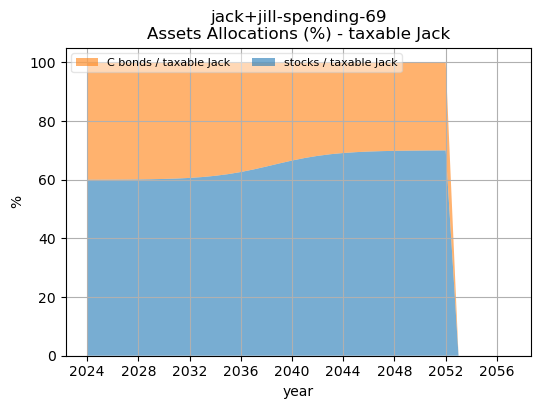

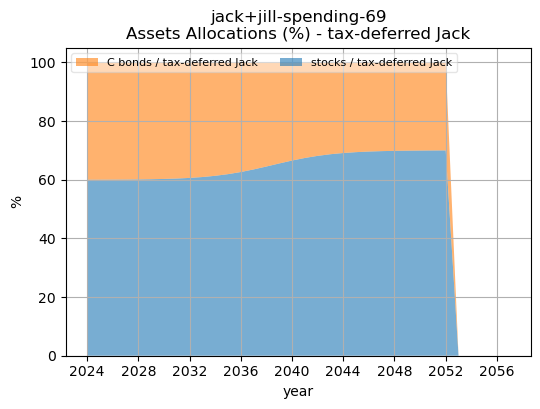

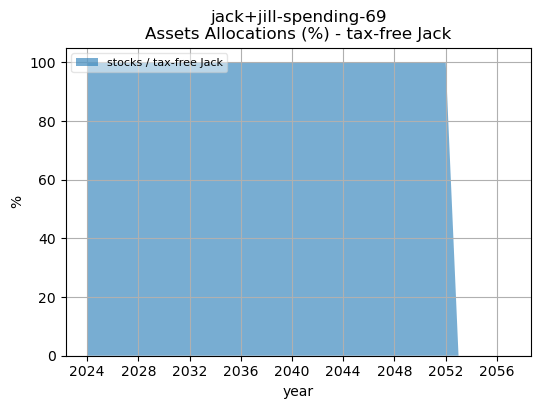

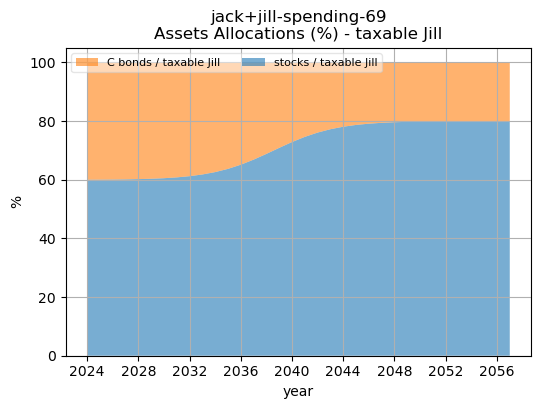

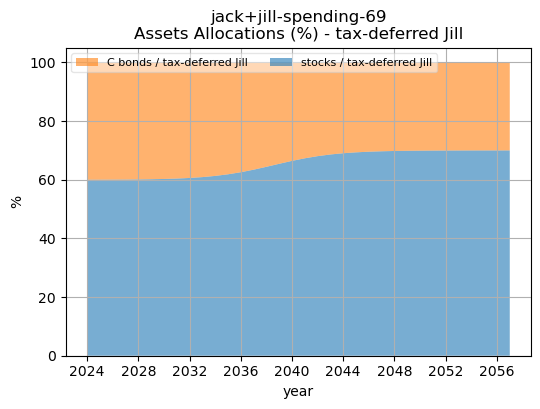

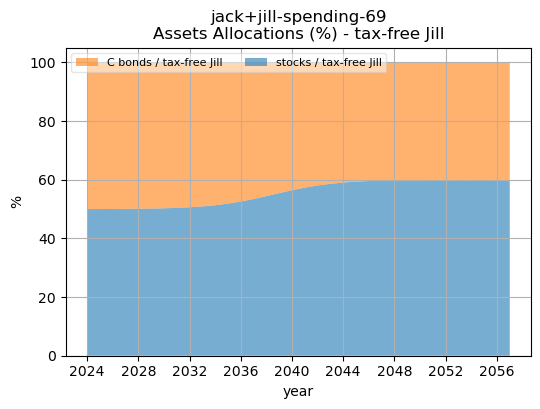

In [7]:
plan.showAllocations()

## What about anticipated fixed income?
Pension and social security are fixed income. Model here assumes that pension income is not inflation adjusted while social security benefits are (but Owl can easily be modified to account for inflation-adjusted pensions). Numbers to be provided are the predicted annual amount for each spouse and the age of the commencement of benefits.

By default, no pension benefits are assumed. This can also be specified explicitly by entering zeros (0) as entries, as in

    plan.setPension([0, 0], [65, 65])
    
For social security, one must provide the predicted annual amount(s) and the starting age(s) at which benefits are anticipated to be received. There are plenty of social security benefit estimators on the web, including the info you can get directly from your own account at the Social Security Administration (ssa.gov). Another interesting calculator can be found at www.opensocialsecurity.com. This calculator allows you to compare different scenarios regarding your commencement age through a sensitivity plot.


Here, Jill has an unindexed pension of \\$10 k per year. Both Jack and Jill believe they have good genes and decided to take their social security benefits at age 70. The amounts provided (28k\\$ and 25k\\$) are estimation of the amounts they would receive at age 70.

In [8]:
plan.setPension([0, 10], [65, 65])
plan.setSocialSecurity([28, 25], [70, 70])

Setting pension of ['$0', '$10,000'] at age(s) [65, 65]
Setting social security benefits of ['$28,000', '$25,000'] at age(s) [70, 70]


## How much net spending is desirable at retirement?
For determining the desirable annual net spending in retirement, certified planners will strongly suggest that you've must have already done a cash flow analysis on your yearly spending. After this exercise, you should have a good idea of how much you'll need in retirement. Another approach is to experiment with multiple spending scenarios and see what your current and future savings can sustain under different market conditions. As one nears retirement, both approaches will need to meet at one point.

The desired spending defined here is the minimum annual **net** spending income (i.e., after paying federal income tax and Medicare) that one would like to receive starting at her/his "retirement age" (we provided a loose definition of the term *retirement age* above). This desired spending must be adjusted for inflation and can follow an additional adjustment called a *smile* profile. A *smile* profile accounts for the fact that your spending capacity will modulate during retirement as you go from the so-called gogo years to the no-go years. A *flat* profile, on the other hand, will keep the same value, which will only be adjusted for inflation. More realistically, the income could also be modulated by the performance of assets, reducing withdrawals in market down years. Some of these strategies (first proposed by Guyton and Klinger) could be implemented in Owl.

These profiles are multipliers to a spending amount to be set, or obtained from an optimization. For example, a flat profile for a single individual would be unity ($1$) for the whole duration of the plan. In contrast, a smile profile would start at a value larger than $1$ and then decrease over the years to a value smaller than unity, then to go above unity toward the end of the plan. The actual spending amount will be determined either by optimization (for `maxSpending`) or be provided by the user (for `maxBequest`). The final spending amount is a *basis* multiplied by the profile. These values are the same for a flat profile, but will differ for a *smile* profile.

A second optional argument can be provided to specify the fraction of spending left to the surviving spouse. The default is 60%.

The target and actual net spending values achieved through the realization can be plotted as will see below.


Jack and Jill believe that their spending profile will follow a *smile* curve rather than a *flat* line.

Setting smile spending profile.
Securing 60% of spending amount for surviving spouse.


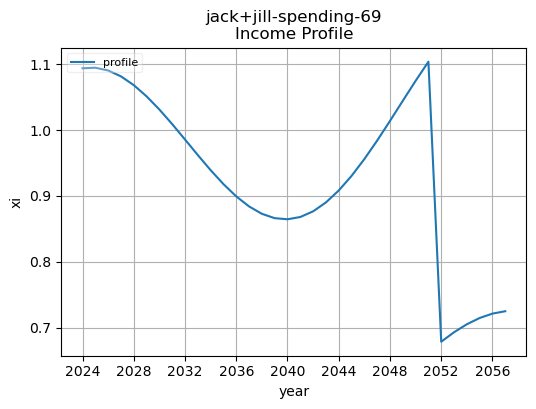

In [9]:
plan.setSpendingProfile('smile', 60)
plan.showProfile()

## Specify rates of return and inflation rate
Rates of return for each class of assets can be specified, including the rate of inflation.
These are important components for  future assumptions.
Setting future rates is done with the `setRates()` method from which one can select different
sources for determining the rates.
Valid choices are *historical*, *stochastic*, *average*, *fixed*, *conservative*, or *default*.

For the *realistic* case, values reported from MorningStar for the next ten years are used. It is selected by using this call:

    plan.setRates('realistic')

*Conservative* rates are lower than the last ten years as most analysts are predicting lower rates from the next decade. These values are fixed rates of 6.0% for the S&P 500, 4.0% for the Corporate bonds markets, 3.5% for the 10-year Treasury notes, with an inflation at around 2.8%. Using these conservative rates can be achieved by using the following call:

    plan.setRates('conservative')

For the *historical*, *stochastic*, and *average* options, data from 1928 to the last year are available for experimenting.
Ranges chosen smaller than the life horizon of the longest-lived individual will have rate values repeated in cycle. For example,
choosing historical data from 1994 to (up and including) 1996 will repeat these three values over the time span of the realization.
This would be called as follows:

    plan.setRates('historical', 1994, 1996)

This case is only provided as an explanatory example, as it would have little practical value.

If the upper bound is not provided as the third argument, then the latest data year (i.e., last year) will be assumed by default.
If one chooses a historical range starting from 1970, Owl will use the rates of 1970 for this year and 1971 for next, etc. This would be simulated as follows:

    plan.setRates('historical', 1970)
  
Due to its particular sequence of rates, the worst-case historical scenario is a retirement starting in 1966. This can be simulated as follows:

    plan.setRates('historical', 1966)

In this case, the  current year will have the same rates as those that happened in 1966, and next year will have those from 1967, and so on. This choice is given for instructional purposes only. No one should make a plan based on the worst-case historical scenario. Nevertheless, it can be informative to test your own case. In practice, however, a success rate larger than 90% over a reasonable set of historical starting years and market assumptions would be acceptable by a large portion of rational thinkers. But this is all a personal choice. We'll cover how to model multiple starting years below.

Alternatively, one can choose a *stochastic* approach in which case the rates are determined from the multivariate distribution for the 4 rates in the selected year range.  The computed statistical distribution of the selected range of data is used to generate random rate values. For example,

    plan.setRates('stochastic', 1945)
    
will analyze the annual rates from 1945 up to last-year and compute means and covariance to generate new data that are statistically representative of the ones observed during this selected time period. The rates randomly generated for the time span can be plotted and examined as we will see below. Similarly,

    plan.setRates('stochastic', 1940, 1970)

would generate random rates consistent to those observed during the 1940 - 1970 time period.

Rates can also be set to fixed values obtained from an average over a time interval using the *average* option. For example, the call

    plan.setRates('average', 1990, 2020)

would set the rates to constant values being the average observed from 1990 to 2020 inclusively. The word 'means' can also be used.
    
Finally one can also use fixed annual rates by providing a list of 4 entries in percent as follows:

    myrates = [9.6, 4.0, 3.0, 3.8]
    plan.setRates('fixed', values=myrates)
    
This example would use fixed rates of 9.6%, 4.0%, 3.0%, and 3.8% as average annual returns on S&P 500, corporate bonds, Treasury notes, and common assets, respectively, with an average annual inflation rate of 3.8% for the full duration of the time simulation. Recall that the common assets class consists of investments tracking inflation only. Therefore the last index serves both to track the common asset class and to adjust values for inflation.

Also note that the S&P 500 rates provided always include dividends, which are assumed to be reinvested.


Jill is interested to know if her situation would survive a retirement started in 1969. The following call would model exactly that situation.

In [10]:
plan.setRates('historical', 1969)
# plan.setRates('conservative')

Using historical rates representing data from 1969 to 2002
Generating rate series of 34 years using historical method.


#### Show annual rates used for calculations
As described above, there are many choices for selecting rates. This graph will display the annual rates used during the time span of this realization.

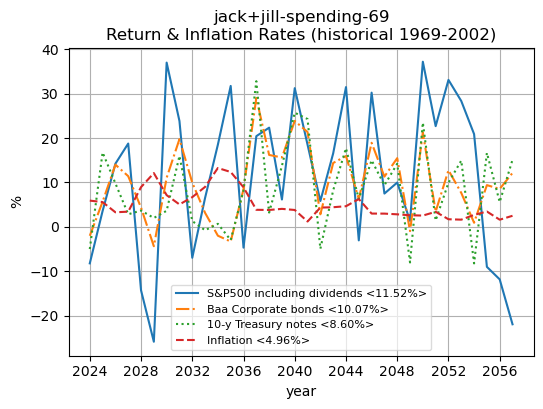

In [11]:
plan.showRates()

##### Show historical rate distribution
Since Owl has the historical rates available, one can also display their histograms using a simple function call. This is done with `owl.showRateDistribution()`. The symbol '<>' means average.

Given the standard deviation of each histogram, the risk/benefit between stocks and bonds is clear. Let's look at the rates distribution over the 30-year period running from 1969 to 1999. Notice how high is the average inflation.

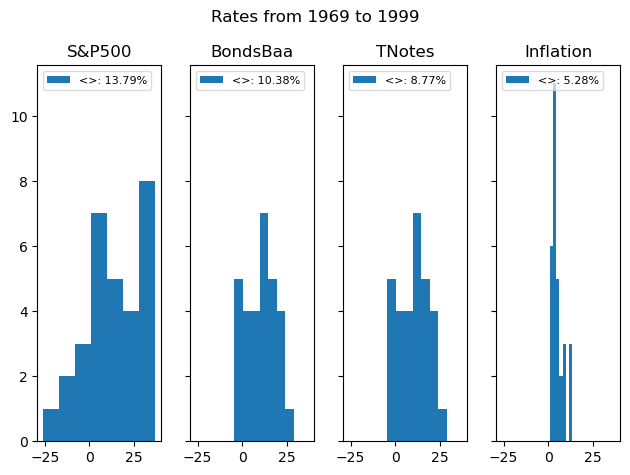

In [12]:
owl.showRateDistributions(1969, 1999)

### Other configurable parameters
There are a few more parameters that can be configured. The following calls are provided as examples. If not specified, the default values are:
- Heirs marginal tax rate: 30%
- Tax rate on long-term capital gains: 15%
- Dividend return rate on equities: 2%
These are provided for reference.

In [13]:
# plan.setHeirsTaxRate(30)
# plan.setLongTermCapitalTaxRate(15)
# plan.setDividendRate(2)

## Generating the outcome of a scenario
We're now ready to run a single instance of a scenario. 

### Maximum net spending
Recall that we set the rates above to mimic those from and after 1969. For this purpose, we only need to run a single realization looking at what would happen if Jack and Jill had retired in 1969. So let's run this plan: The following function call runs all the required calculations for the time horizon over Jack and Jill's life expectancy. The function `solve()` will optimize the selected scenario using linear programming. But we first need to select what needs to be optimized by providing one of the parameters `maxSpending` or `maxBequest`.

Let's first maximize the net spending subject to leaving a bequest of 500 k\\$ and limiting Roth conversions to be less than 150k\\$ if needed. If `maxRothConversion` is set to 'file', only conversions in the contributions worksheet file will be performed. Some plans do not allow for Roth conversions. Let's assume Jill's 403b plan does not allow Roth conversions. We will specify `'noRothConversions': 'Jill'` to indicate not to convert for Jill. For cases where none of the individuals can make Roth conversions, just set `maxRothConversion` to `0`.

In [14]:
%%time
options = {'maxRothConversion': 150, 'bequest': 500, 'noRothConversions': 'Jill'}
plan.solve('maxSpending', options=options)

Adjusting parameters for inflation.
Self-consistent Medicare loop returned after 2 iterations.
Optimization terminated successfully. (HiGHS Status 7: Optimal)
CPU times: total: 3.44 s
Wall time: 6.97 s


## Saving and retrieving parameters to/from a configuration file
All parameters selected can be stored into a configuration file using the `saveConfig()` method. Note that any existing file will be overwriten. This configuration file is readable using a text editor. The name of the file will be the name of the plan with the `.cfg` extension.

In [15]:
plan.saveConfig()

Saving plan config as "jack+jill-spending-69.cfg".


This configuration can be read back into the future. This is done using the `readConfig()` function which returns a new plan configured in a way identical to the one saved. To solve this new plan with the same options as the original plan, one uses the function `resolve()`. Here is an example:

In [16]:
newplan = owl.readConfig('jack+jill-spending-69')
newplan.resolve()

Reading plan configuration from file 'jack+jill-spending-69.cfg'.
Plan for 2 individuals: ['Jack', 'Jill'].
Preparing scenario of 34 years for 2 individuals.
Individual 1: life horizon from 2024 -> 2051.
Individual 2: life horizon from 2024 -> 2057.
Name of individual(s) will be read with readContributions(file).
Problem has 8 distinct time series forming 992 decision variables.
Setting spousal surplus deposit fraction to 0.5.
	Jack: 0.5, Jill: 0.5
Dividend return rate on equities set to 2.0%.
Long-term capital gain income tax set to 15%.
Spousal beneficiary fractions set to [1, 1, 1]
Consider changing spousal deposit fraction for better convergence.
	See setSpousalDepositFraction() for details.
Heirs tax rate on tax-deferred portion of estate set to 30%.
Setting pension of ['$0', '$10,000'] at age(s) [65, 65]
Setting social security benefits of ['$28,000', '$25,000'] at age(s) [70, 70]
Setting smile spending profile.
Securing 60% of spending amount for surviving spouse.
Using historic

At this point, both `plan` and `newplan` are identical plans (twins).

## Analysis

To get some information about the plan at the last year of the realization, one can use

      plan.summary()
    
which returns the value of the assets in today's \\$ at the last year of the scenario, assuming (in this case) a 30\% tax burden on the taxable portion of the bequeathed estate (read tax-deferred savings accounts). The `summary()` function returns two values: the total post-tax value of all savings account in today's dollars and the cumulative inflation rate between today and the last day of the realization.

In [17]:
plan.summary()

SUMMARY ================================================================
Plan name: jack+jill-spending-69
        Jack's life horizon: 2024 -> 2051
        Jill's life horizon: 2024 -> 2057
Contributions file: jack+jill.xlsx
Initial balances [taxable, tax-deferred, tax-free]:
        Jack's accounts: ['$90,000', '$600,000', '$70,000']
        Jill's accounts: ['$60,000', '$150,000', '$40,000']
Return rates: historical
Rates used: from 1969 to 2002
Optimized for: maxSpending
Solver options: {'maxRothConversion': 150, 'bequest': 500, 'noRothConversions': 'Jill'}
Number of decision variables: 992
Number of constraints: 894
Spending profile: smile
Surviving spouse spending needs: 60%
Net yearly spending in year 2024: $95,028
Net yearly spending profile basis in 2024$: $86,870
Total net spending in 2024$: $2,745,103 ($7,747,822 nominal)
Total Roth conversions in 2024$: $290,364 ($496,858 nominal)
Total ordinary income tax paid in 2024$: $222,787 ($434,999 nominal)
Total dividend tax paid in

##### Selecting preferred graphs
By default, all graphs are shown in nominal dollars. To change the default behavior of all graphs, the `setDefaultPlots()` method can be called with either *nominal* or *today* as an argument. The default behavior can also be overridden using the `value` argument for each individual call. For example
```
plan.showGrossIncome(value='today')
plan.showNetSpending(value='nominal')
```

In [18]:
plan.setDefaultPlots('today')

#### Show net spending compared to target spending over the years
This graph shows how the actual net spending generated by the plan realization matches the inflation-adjusted net spending profile specified. Note the 40% drop in target spending as one spouse passes. This drop is configurable through the `setProfile()` method. Default value is 60%.

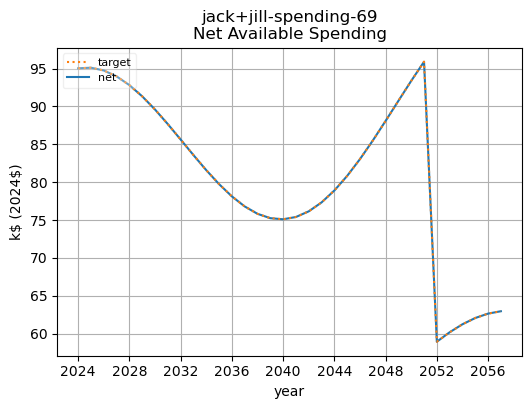

In [19]:
plan.showNetSpending()

#### Show taxable annual ordinary income and anticipated tax brackets
Gross income also includes Roth conversions and big-ticket items, both of which are not contributing to your net income. This graph shows Jack and Jill's gross taxable income and how it compare with some anticipated federal tax marginal brackets. This visualization is very convenient when one wants to perform Roth conversions and remain below a certain tax bracket.

Notice the shift in tax brackets occurring as the Tax Cut and Job Act expires after 2025.

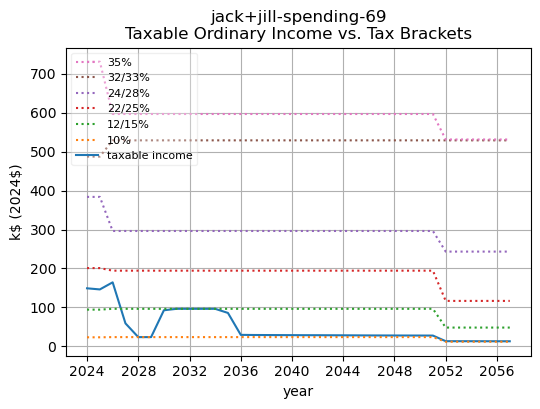

In [20]:
plan.showGrossIncome()

#### Show annual taxes paid over the years of the realization
This graph shows how much Jack and Jill paid in federal taxes and IRMAA income-related Medicare insurance monthly adjustments over the years of this realization.

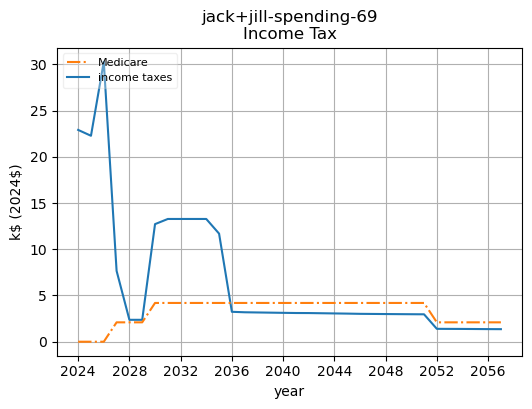

In [21]:
plan.showTaxes()

#### Show sources of income over the years
Income will typically come from multiple sources, and it can be quite complex. This graphs shows the breakdown of Jack and Jill's sources of income by spouse and by origin. Notice that additional distributions from tax-deferred accounts (*dist*) are distinguished from required minimum distributions (*rmd*) as they serve different purposes. Other labels should be self-explanatory.

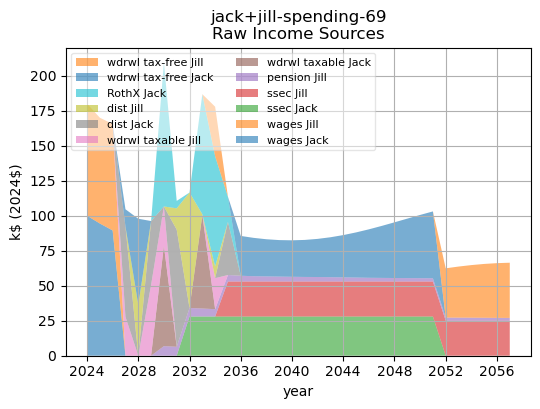

In [22]:
plan.showSources()

#### Show savings accounts balances at the beginning of each year
The balance for each savings account for each spouse is calculated at the beginning of each year. Another important aspect of this graph is how much is left at the end of the realization. This depends on the optimization requested (`maxSpending` or `maxBequest`) and the constraint on the `bequest`. In the current case, a bequest of 500 k\\$ in today's \\$ was requested, which amounts to 2,492 k\\$ in nominal value. 

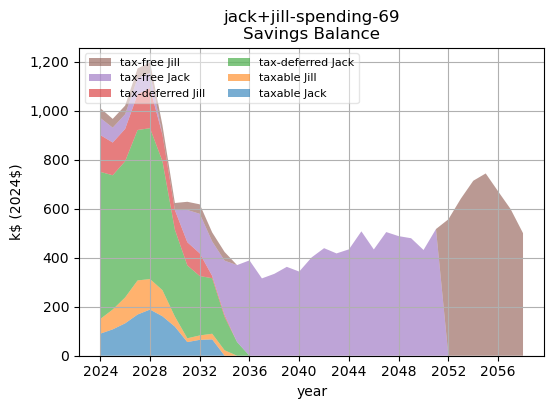

In [23]:
plan.showAccounts()

#### Show asset distribution
The distribution of assets in each savings account can be shown by the following command. It shows the value and the class of assets for each savings account over time.

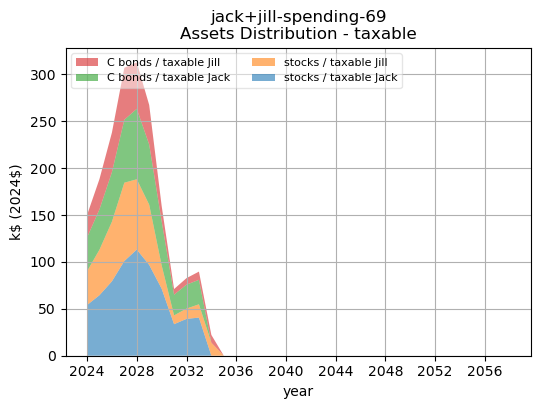

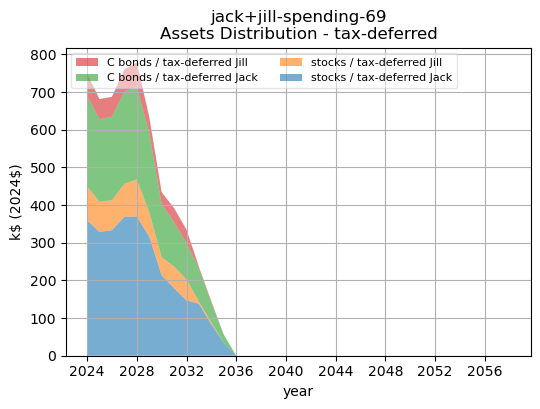

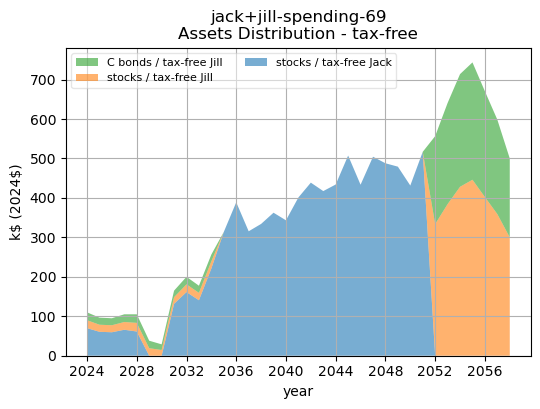

In [24]:
plan.showAssetDistribution()

## Saving the yearly details of this realization in a spreadsheet
This instance of a future realization contains information on the yearly distribution amounts, including the required minimum distribution that had to be performed under the given assumptions. This info can be saved in an excel workbook with one spreadsheet (tab) for each spouse. Worksheet will also contain annual rates, income, income taxes, and account balances. Second `True/False` argument controls if existing files get overwritten. Also remember that Windows will not allow the file to be overwritten while the file is being opened in Excel. In that case, the script will ask you to close the file and will retry to save.

All values in the workbook are in nominal dollars. The Excel file will be named `workbook_...` where `...` is the name of the plan.

Here, this call will create an excel workbook with one spreadsheet (tab) for Jack and one for Jill. 

Open the file in Excel to see what it looks like. 

In [25]:
plan.saveWorkbook(True)

Saving plan as "workbook_jack+jill-spending-69.xlsx".


## Maximum bequest
Alternatively, one could optimize for maximum bequest subject to a net spending of 90k\\$ per year for the first year. Note that the net spending basis might be different if a *smile* profile is used, as the first year spending amount is higher than in subsequent years.

To perform this additional calculation, we could reuse the same plan and just change its name using the `rename()` method. This approach can cause unnecessary confusion if cells are run out of order. We will first discuss how to make copies of a plan.

#### Making a copy of a plan

Preferably, we could clone our original plan and provide a new name to it using the `owl.clone()` function as in the following code.

```
 plan2 = owl.clone(plan, 'jack+jill-bequest-1969')
```
This would create a new plan identical to `plan` but with the new name *jack+jill-bequest-1969*.

To make this tutorial more complete, however, we will instead create a new plan configured by reading the configuration file that was saved earlier in this notebook using the `saveConfig()` function. Reading a configuration file is achieved using the `owl.readConfig()`. We would then rename the plan after configuration is read.

Here is how this would be done:

In [26]:
plan2 = owl.readConfig('jack+jill-spending-69')
plan2.rename('jack+jill-bequest-69')

Reading plan configuration from file 'jack+jill-spending-69.cfg'.
Plan for 2 individuals: ['Jack', 'Jill'].
Preparing scenario of 34 years for 2 individuals.
Individual 1: life horizon from 2024 -> 2051.
Individual 2: life horizon from 2024 -> 2057.
Name of individual(s) will be read with readContributions(file).
Problem has 8 distinct time series forming 992 decision variables.
Setting spousal surplus deposit fraction to 0.5.
	Jack: 0.5, Jill: 0.5
Dividend return rate on equities set to 2.0%.
Long-term capital gain income tax set to 15%.
Spousal beneficiary fractions set to [1, 1, 1]
Consider changing spousal deposit fraction for better convergence.
	See setSpousalDepositFraction() for details.
Heirs tax rate on tax-deferred portion of estate set to 30%.
Setting pension of ['$0', '$10,000'] at age(s) [65, 65]
Setting social security benefits of ['$28,000', '$25,000'] at age(s) [70, 70]
Setting smile spending profile.
Securing 60% of spending amount for surviving spouse.
Using historic

#### Solving for maximum bequest
We are now ready to solve for maximum bequest, suject to a netSpending of \\$90k in the first year, maximum Roth conversion of \\$150k for Jack and no Roth conversions for Jill.

In [27]:
%%time
options = {'maxRothConversion': 150, 'netSpending': 90, 'noRothConversions': 'Jill'}
plan2.solve('maxBequest', options=options)

Adjusting parameters for inflation.
Self-consistent Medicare loop returned after 2 iterations.
Optimization terminated successfully. (HiGHS Status 7: Optimal)
CPU times: total: 2 s
Wall time: 4.37 s


### Analysis

In [28]:
plan2.summary()

SUMMARY ================================================================
Plan name: jack+jill-bequest-69
        Jack's life horizon: 2024 -> 2051
        Jill's life horizon: 2024 -> 2057
Contributions file: jack+jill.xlsx
Initial balances [taxable, tax-deferred, tax-free]:
        Jack's accounts: ['$90,000', '$600,000', '$70,000']
        Jill's accounts: ['$60,000', '$150,000', '$40,000']
Return rates: historical
Rates used: from 1969 to 2002
Optimized for: maxBequest
Solver options: {'maxRothConversion': 150, 'netSpending': 90, 'noRothConversions': 'Jill'}
Number of decision variables: 992
Number of constraints: 894
Spending profile: smile
Surviving spouse spending needs: 60%
Net yearly spending in year 2024: $90,000
Net yearly spending profile basis in 2024$: $82,274
Total net spending in 2024$: $2,599,865 ($7,337,901 nominal)
Total Roth conversions in 2024$: $347,148 ($583,535 nominal)
Total ordinary income tax paid in 2024$: $222,625 ($436,374 nominal)
Total dividend tax paid i

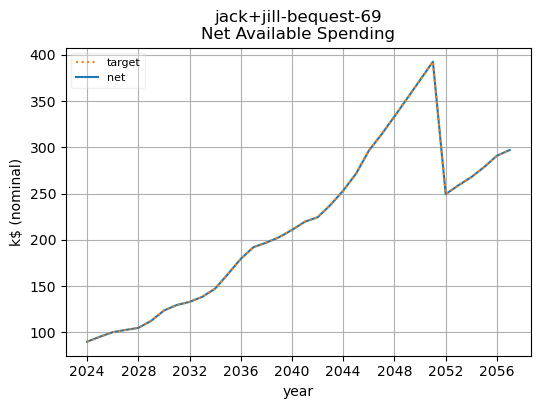

In [29]:
plan2.showNetSpending()

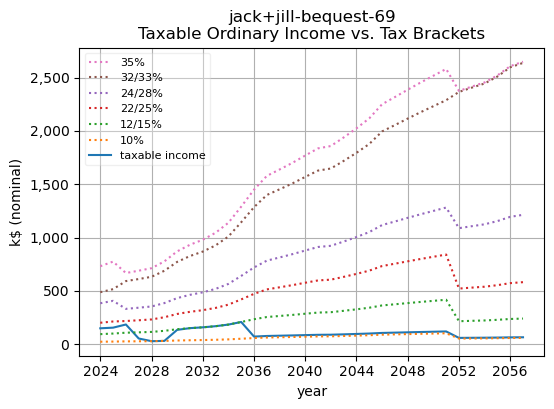

In [30]:
plan2.showGrossIncome()

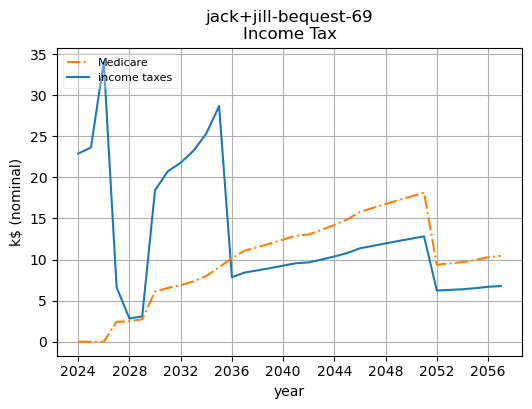

In [31]:
plan2.showTaxes()

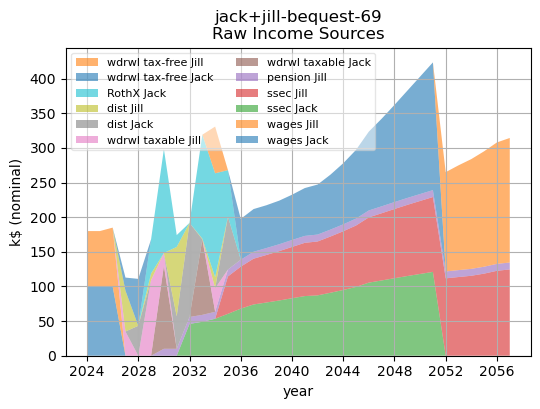

In [32]:
plan2.showSources()

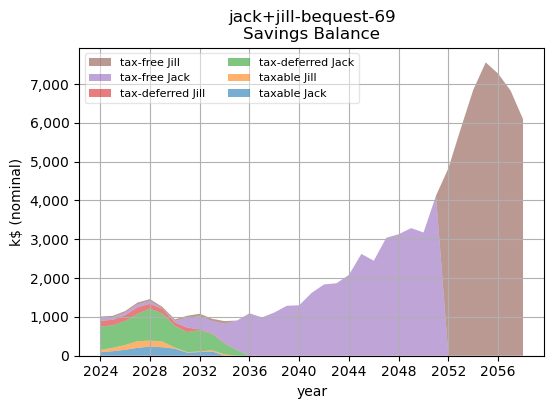

In [33]:
plan2.showAccounts()

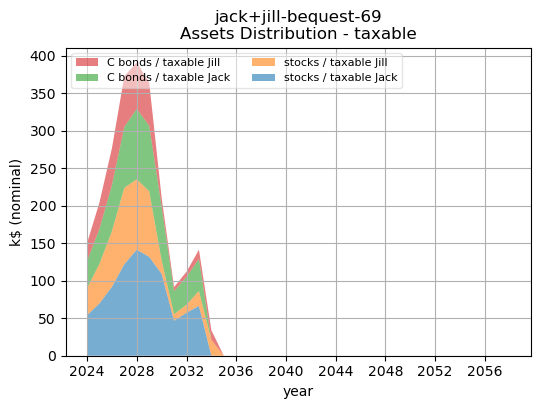

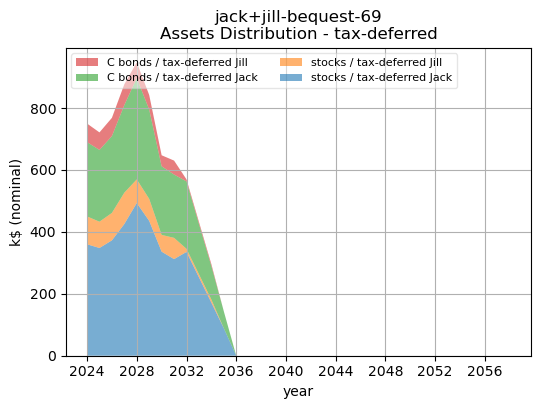

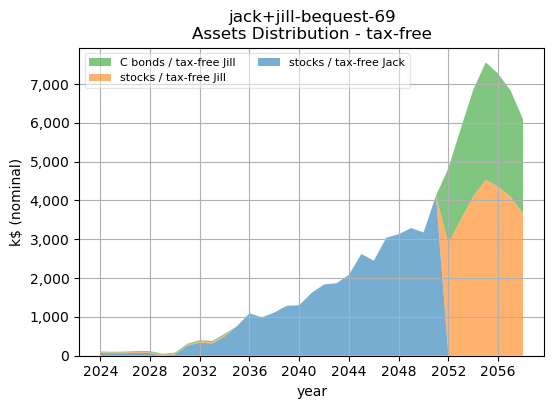

In [34]:
plan2.showAssetDistribution()

Notice how assets get shifted from the tax-free account to the taxable savings account towards the end of the plan. This might first sound counter-productive, when considering the tax-exempt benefits for the heirs. However, the optimizer is maximizing the assets at the end of the plan only. As asset allocations in Jill's taxable savings account are favoring stocks over securities, therefore the optimal solution *at the end of the plan* will move the assets where return rates are most favorable.

In [35]:
plan2.saveWorkbook(True)

Saving plan as "workbook_jack+jill-bequest-69.xlsx".


This notebook is provided as a basic example on what you can do to assess the robustness and sensitivity of your retirement strategy. Go and explore!


Enjoy!
